<a href="https://colab.research.google.com/github/nov05/Google-Colaboratory/blob/master/20250227_DSBA_Project_EasyVisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Notebook was changed by nov05 on 2025-02-27
* ✅ I marked some of the import content with this sign.    
* [This Kaggle post](https://www.kaggle.com/code/mariyamalshatta/easy-visa-ensemble-techniques#Stacking-Classifier) reported test accuracy of **74.5%** using XGBoost, etc.   

# 🟢 **EasyVisa Project**  


## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The **Immigration and Nationality Act (INA)** of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the **Office of Foreign Labor Certification (OFLC)**.

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### **Data Description**  

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* **case_id**: ID of each visa application
* **continent**: Information of continent the employee
* **education_of_employee**: Information of education of the employee
* **has_job_experience**: Does the employee has any job experience? Y= Yes; N = No
* **requires_job_training**: Does the employee require any job training? Y = Yes; N = No
* **no_of_employees**: Number of employees in the employer's company
* **yr_of_estab**: Year in which the employer's company was established
* **region_of_employment**: Information of foreign worker's intended region of employment in the US.
* **prevailing_wage**:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* **unit_of_wage**: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position**: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* **case_status**:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [ ]:
!pip install --upgrade pip setuptools

In [ ]:
!pip install ydata-profiling

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Importing Dataset

In [ ]:
# visa = pd.read_csv('EasyVisa.csv') ##  Fill the blank to read the data
url = "https://drive.google.com/uc?id=1WO99xOv0L86HY_T5iENcTIV4mA3iMdQl"
data = pd.read_csv(url)   ## I would usually use a variable like "df_visa" rather than "data".
# print(data.shape)
## data.sample(5)

In [ ]:
## skip this step for it is a small dataset and we can always reload it from the csv file
# copying data to another variable to avoid any changes to original data
# data = visa.copy()

## Overview of the Dataset

* Here is an example of using ydata profiling:
    * [usage report](https://github.com/nov05/udacity-cd0385-project-starter/blob/main/project/project_report.md)  
    * [ydata profiling report](https://nov05.github.io/udacity-cd0385-project-starter/project/ydata_profiling_report.html)    

In [ ]:
%%time
## ✅ Use ydata profiling tool to automate some work
## pay attention to the "Alerts" tab content
from ydata_profiling import ProfileReport
profile = ProfileReport(data.drop(['no_of_employees'], axis=1),
                        title="DSBA YData Profiling Report",
                        explorative=True)
profile.to_notebook_iframe()
# profile.to_file("dsba_ydata_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 10 s, sys: 4.62 s, total: 14.6 s
Wall time: 11.2 s


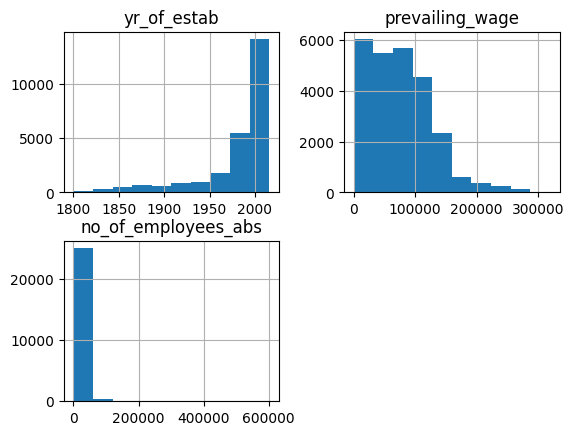

In [ ]:
data.drop(['case_id', 'no_of_employees'], axis=1).hist();
## those distributions are all highly skewed, which means log/power/box-cox/Winsorization etc.
## transformation needs to be applied before being used as features
## https://colab.research.google.com/drive/1tdzWAhk-HRN70GCV1krCI8SqqWlVWxTv?#scrollTo=J-RWMrMOnMtv

### View the first and last 5 rows of the dataset

In [ ]:
data.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

In [ ]:
data.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

### Understand the shape of the dataset

In [ ]:
data.shape

(25480, 12)

### Check the data types of the columns for the dataset

In [ ]:
data.info()
## no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

#### The dataset has 25,480 row, 12 column, no duplicated values

#### Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [ ]:
data.describe().T

count          mean           std        min       25%  \
no_of_employees  25480.0   5667.043210  22877.928848   -26.0000   1022.00   
yr_of_estab      25480.0   1979.409929     42.366929  1800.0000   1976.00   
prevailing_wage  25480.0  74455.814592  52815.942327     2.1367  34015.48   

                      50%          75%        max  
no_of_employees   2109.00    3504.0000  602069.00  
yr_of_estab       1997.00    2005.0000    2016.00  
prevailing_wage  70308.21  107735.5125  319210.27

#### Fixing the negative values in number of employees columns

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [ ]:
# Checking for negative values in the 'employee' column
negative_values = data.loc[data['no_of_employees'] < 0]
shape_of_negatives = negative_values.shape
print(shape_of_negatives)

(33, 12)


In [ ]:
## there are indeed 33 rows of data with negative no_of_employees... amazing
## we need some explanation here: what does it mean to have negative number of employees?
df_tmp = data[data["no_of_employees"]<=0]
print(df_tmp.shape)
df_tmp.sample(2)

(33, 12)


case_id continent education_of_employee has_job_experience  \
17006  EZYV17007      Asia             Doctorate                  Y   
2918    EZYV2919      Asia              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
17006                     N              -11         1984   
2918                      N              -26         2005   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
17006                 West         25753.51         Year                  Y   
2918               Midwest        112799.46         Year                  Y   

      case_status  
17006      Denied  
2918    Certified

In [ ]:
# Taking the absolute values for number of employees
## we usually keep the original column and create a new column for it
data["no_of_employees_abs"] = abs(data["no_of_employees"])

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Checking the number of unique values
unique_count = data["case_id"].nunique()
print(unique_count, len(data["case_id"]))
## make sure each case_id is unique

25480 25480


In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [ ]:
## ✅ use apply() on rows and cols to improve performance
pd.concat([data.apply(lambda col: col.nunique()),
           data.apply(lambda col: col.unique())], axis=1)

0  \
case_id                25480   
continent                  6   
education_of_employee      4   
has_job_experience         2   
requires_job_training      2   
no_of_employees         7105   
yr_of_estab              199   
region_of_employment       5   
prevailing_wage        25454   
unit_of_wage               4   
full_time_position         2   
case_status                2   
no_of_employees_abs     7105   

                                                                       1  
case_id                [EZYV01, EZYV02, EZYV03, EZYV04, EZYV05, EZYV0...  
continent              [Asia, Africa, North America, Europe, South Am...  
education_of_employee     [High School, Master's, Bachelor's, Doctorate]  
has_job_experience                                                [N, Y]  
requires_job_training                                             [N, Y]  
no_of_employees        [14513, 2412, 44444, 98, 1082, 2339, 4985, 303...  
yr_of_estab            [2007, 2002, 2008, 1897, 2005, 2012, 1994, 192...  
region_of_employment           [West, Northeast, South, Midwest, Island]  
prevailing_wage        [592.2029, 83425.65, 122996.86, 83434.03, 1499...  
unit_of_wage                                   [Hour, Year, Week, Month]  
full_time_position                                                [Y, N]  
case_status                                          [Denied, Certified]  
no_of_employees_abs    [14513, 2412, 44444, 98, 1082, 2339, 4985, 303...

In [ ]:
# Dropping the 'case_id' column from the data
# data.drop(["case_id"], axis=1, inplace=True)

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on number of employees

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    print(f"Creating histogram and boxplot for feature: {feature}")
    print(f"Data size: {len(data)}")

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    plt.show()

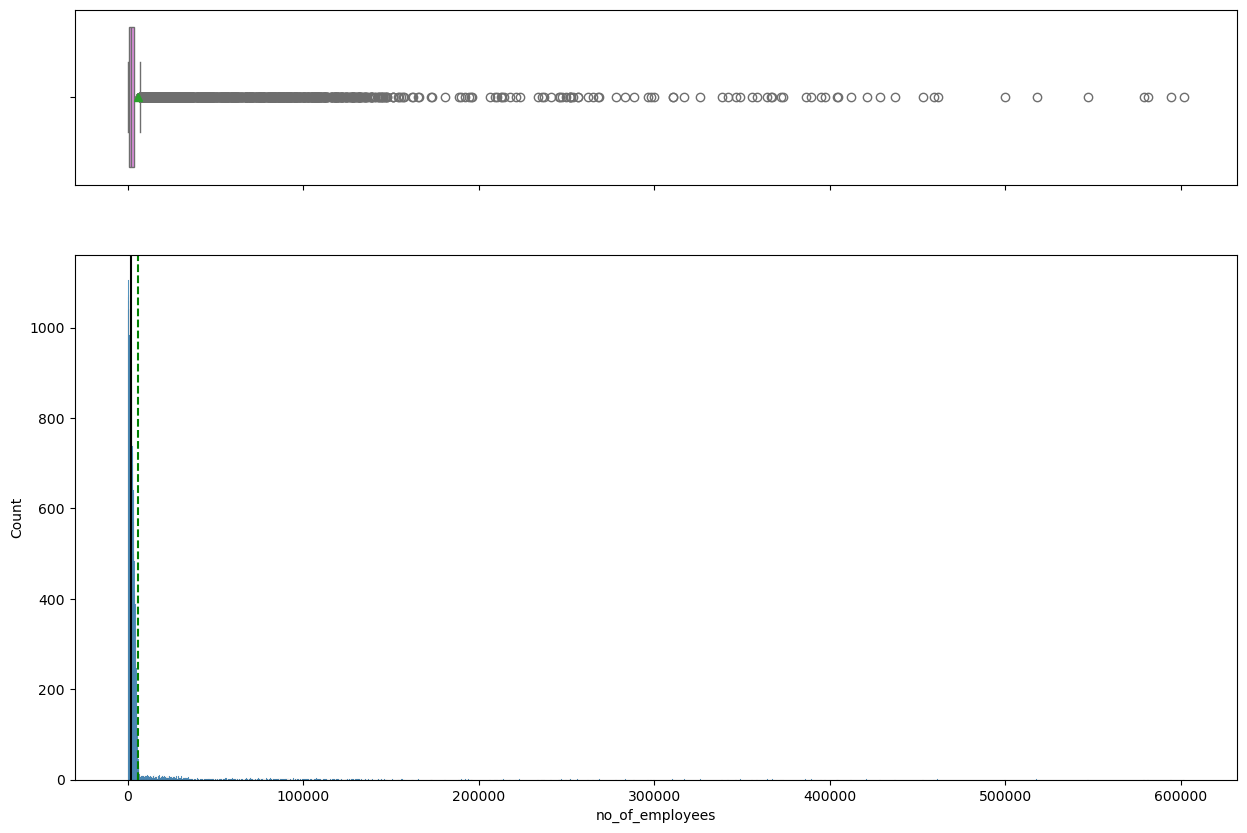

In [ ]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

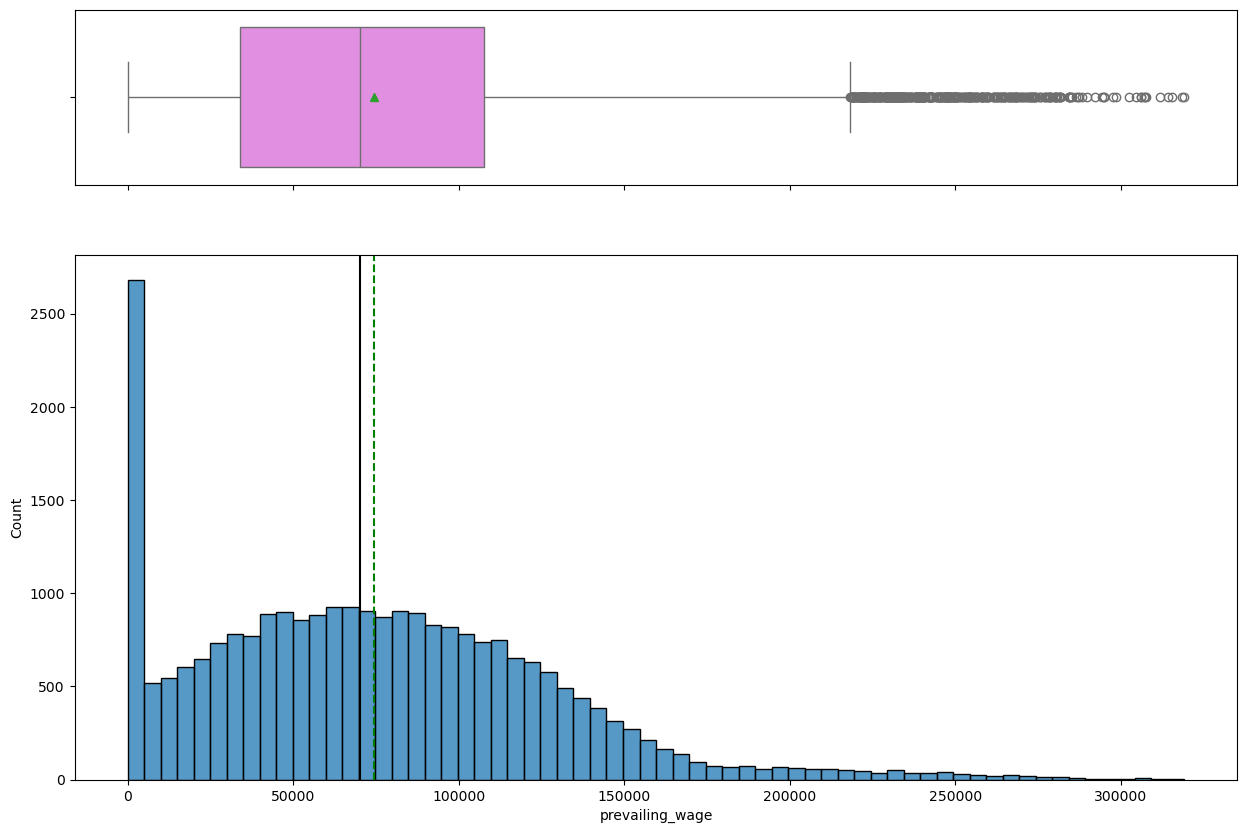

In [ ]:
histogram_boxplot(data, 'prevailing_wage')

In [ ]:
# Checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage'] < 100]

continent education_of_employee has_job_experience  \
338             Asia            Bachelor's                  Y   
634             Asia              Master's                  N   
839             Asia           High School                  Y   
876    South America            Bachelor's                  Y   
995             Asia              Master's                  N   
...              ...                   ...                ...   
25023           Asia            Bachelor's                  N   
25258           Asia            Bachelor's                  Y   
25308  North America              Master's                  N   
25329         Africa            Bachelor's                  N   
25461           Asia              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
338                       N             2114         2012   
634                       N              834         1977   
839                       N             4537         1999   
876                       N              731         2004   
995                       N              302         2000   
...                     ...              ...          ...   
25023                     Y             3200         1994   
25258                     N             3659         1997   
25308                     N            82953         1977   
25329                     N             2172         1993   
25461                     N             2861         2004   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
338              Northeast          15.7716         Hour                  Y   
634              Northeast           3.3188         Hour                  Y   
839                   West          61.1329         Hour                  Y   
876              Northeast          82.0029         Hour                  Y   
995                  South          47.4872         Hour                  Y   
...                    ...              ...          ...                ...   
25023                South          94.1546         Hour                  Y   
25258                South          79.1099         Hour                  Y   
25308            Northeast          42.7705         Hour                  Y   
25329            Northeast          32.9286         Hour                  Y   
25461                 West          54.9196         Hour                  Y   

      case_status  
338     Certified  
634        Denied  
839        Denied  
876        Denied  
995     Certified  
...           ...  
25023      Denied  
25258      Denied  
25308      Denied  
25329      Denied  
25461      Denied  

[176 rows x 11 columns]

In [ ]:
# Getting the count of values in the 'unit_of_wage' column for rows with prevailing_wage < 100
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

unit_of_wage
Hour     176
Month      0
Week       0
Year       0
Name: count, dtype: int64

#### Observations on continent

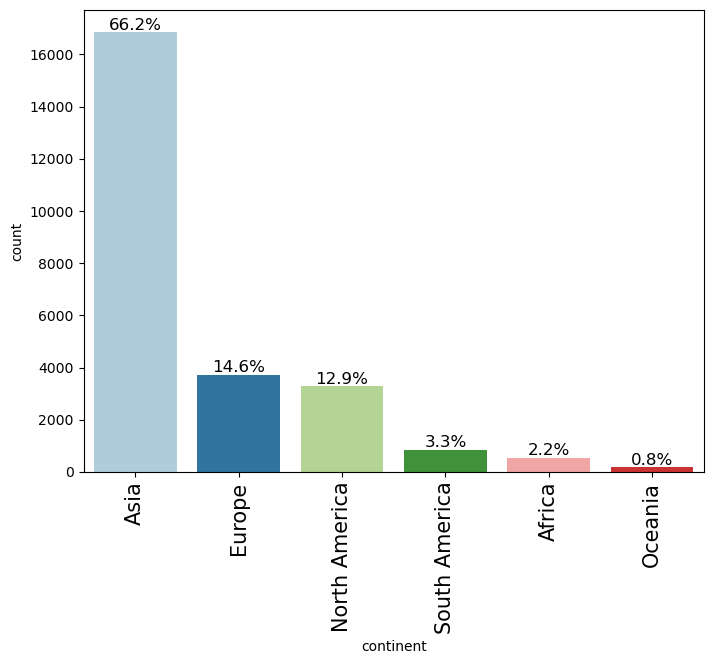

In [ ]:
labeled_barplot(data, "continent", perc=True)

#### Observations on education of employee

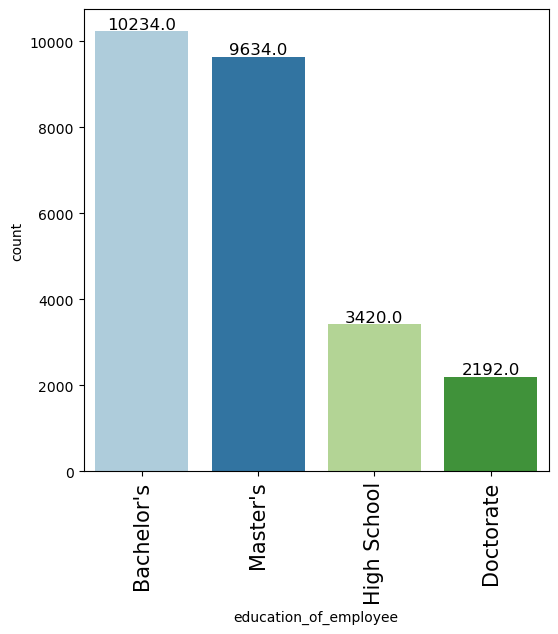

In [ ]:
# Call the function for the 'education_of_employee' column
labeled_barplot(data, 'education_of_employee')

#### Observations on job experience

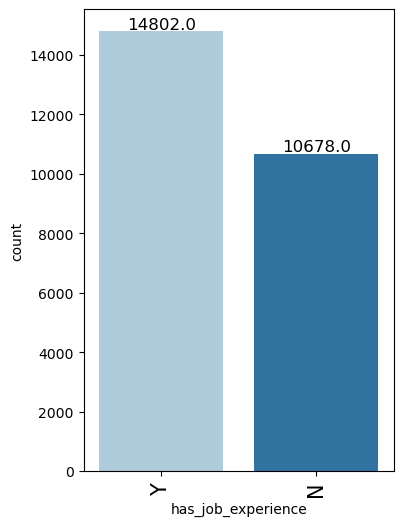

In [ ]:
labeled_barplot(data, 'has_job_experience')

#### Observations on job training

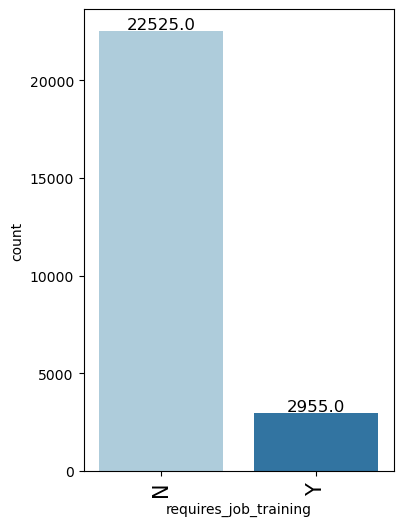

In [ ]:
labeled_barplot(data,'requires_job_training')

#### Observations on region of employment

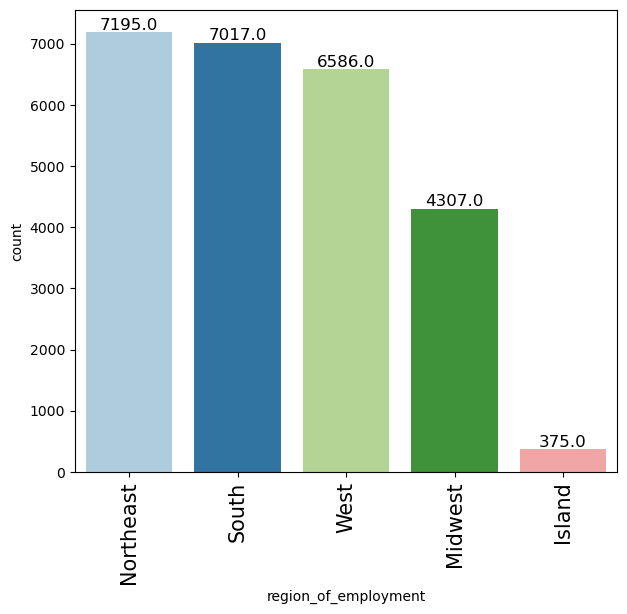

In [ ]:
labeled_barplot(data, 'region_of_employment')

#### Observations on unit of wage

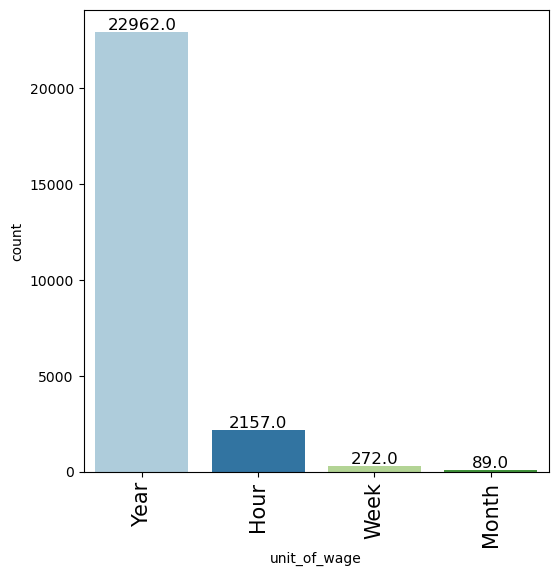

In [ ]:
labeled_barplot(data, 'unit_of_wage')

#### Observations on case status

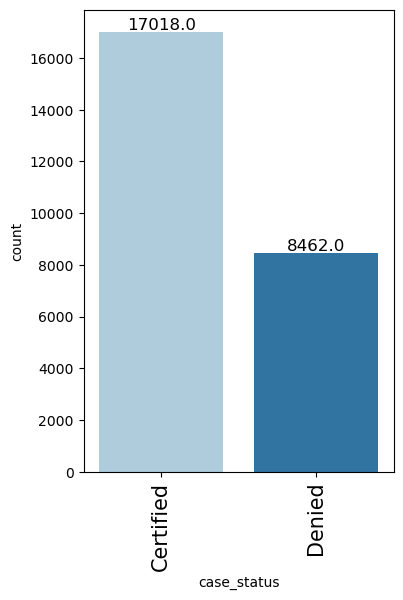

In [ ]:
labeled_barplot(data, "case_status")

### Bivariate Analysis

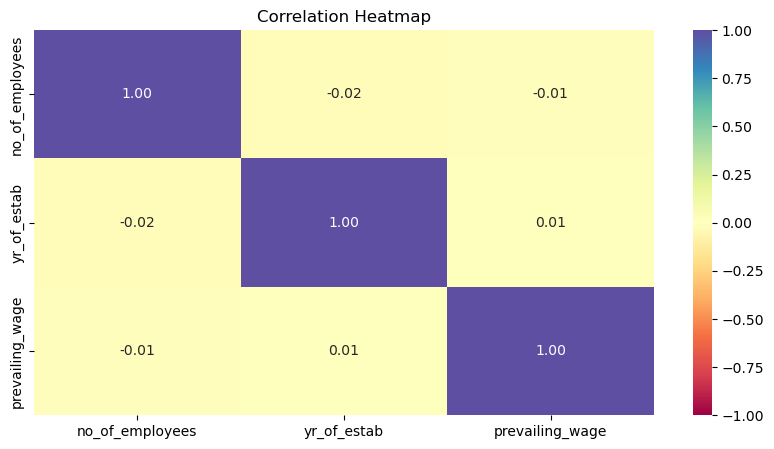

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
# Create a heatmap of the correlation matrix
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title('Correlation Heatmap')
plt.show()

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


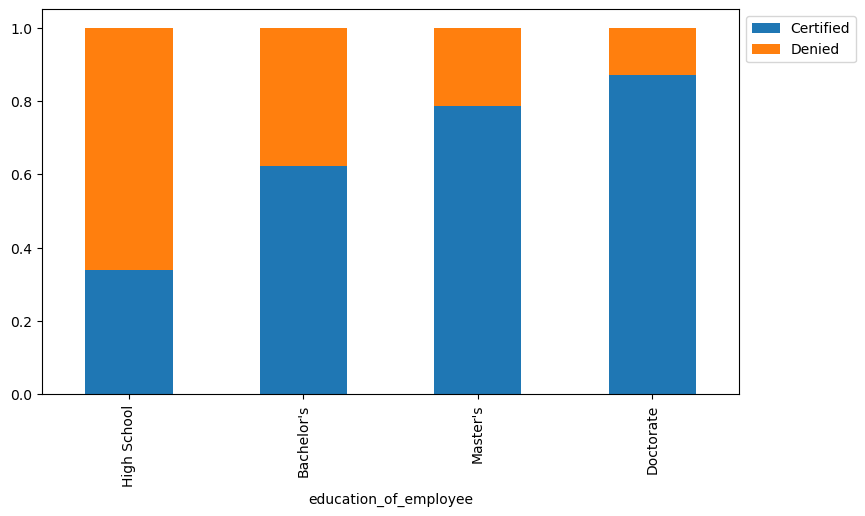

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

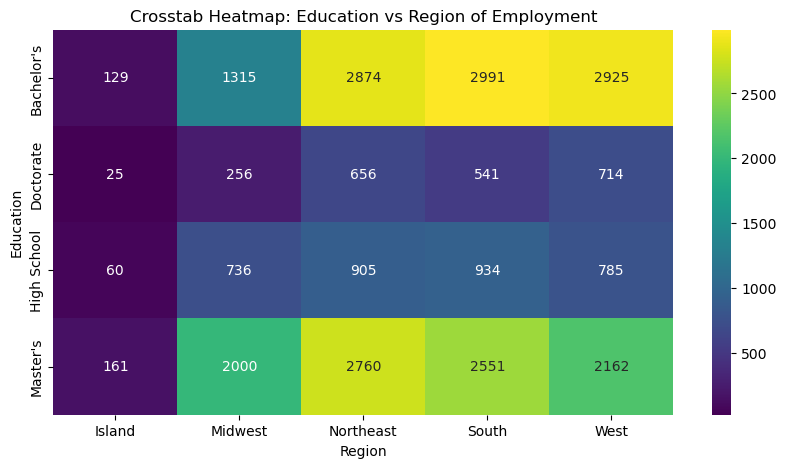

In [ ]:
plt.figure(figsize=(10, 5))

# Create a crosstab between education and region of employment
crosstab_data = pd.crosstab(data['education_of_employee'], data['region_of_employment'])

# Plot the heatmap
sns.heatmap(crosstab_data,
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.title("Crosstab Heatmap: Education vs Region of Employment")
plt.show()

#### Let's have a look at the percentage of visa certifications across each region

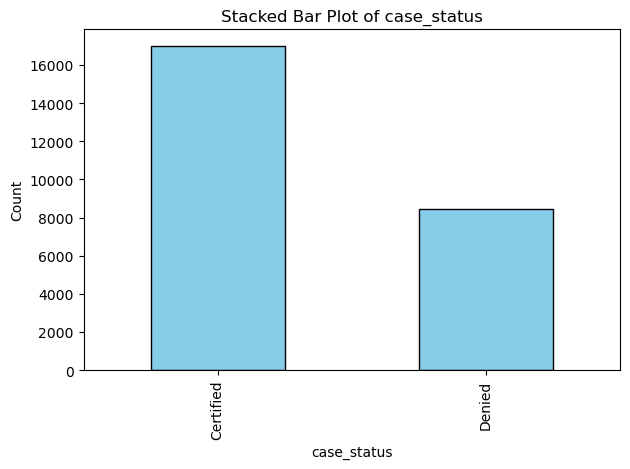

In [ ]:
import matplotlib.pyplot as plt

def stacked_barplot(data, feature):
    """
    Create a stacked bar plot for a specified feature.

    data: DataFrame
    feature: Column name for which to create the stacked bar plot
    """
    # Count occurrences of each category in the feature
    counts = data[feature].value_counts()

    # Create a bar plot
    counts.plot(kind='bar', stacked=True, color='skyblue', edgecolor='black')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Plot of {feature}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function for the 'case_status' column
stacked_barplot(data, "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

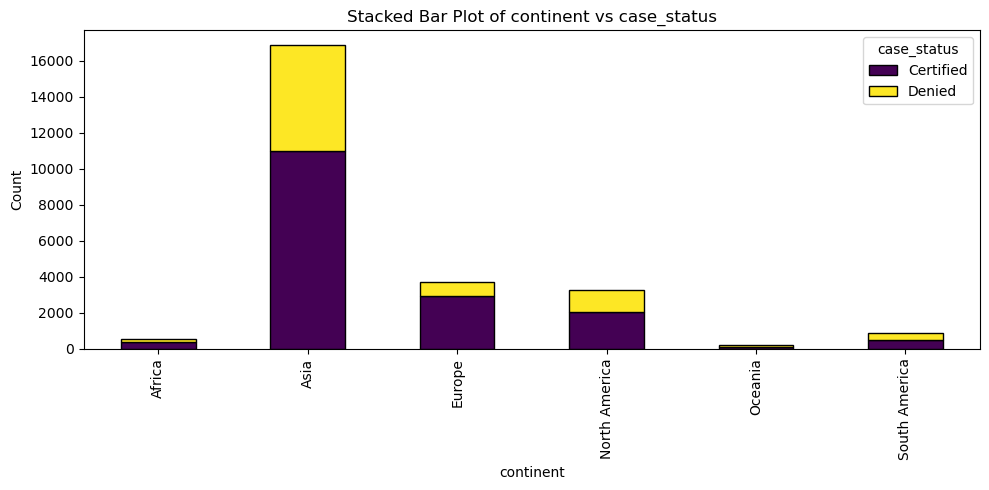

In [ ]:
import matplotlib.pyplot as plt

def stacked_barplot(data, feature1, feature2):
    """
    Create a stacked bar plot for two specified features.

    data: DataFrame
    feature1: Column name for the x-axis
    feature2: Column name for the stacking
    """
    # Create a crosstab to count occurrences of each combination
    crosstab_data = pd.crosstab(data[feature1], data[feature2])

    # Create a stacked bar plot
    crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 5), cmap='viridis', edgecolor='black')

    # Add labels and title
    plt.xlabel(feature1)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Plot of {feature1} vs {feature2}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function for 'continent' and 'case_status'
stacked_barplot(data, 'continent', 'case_status')

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

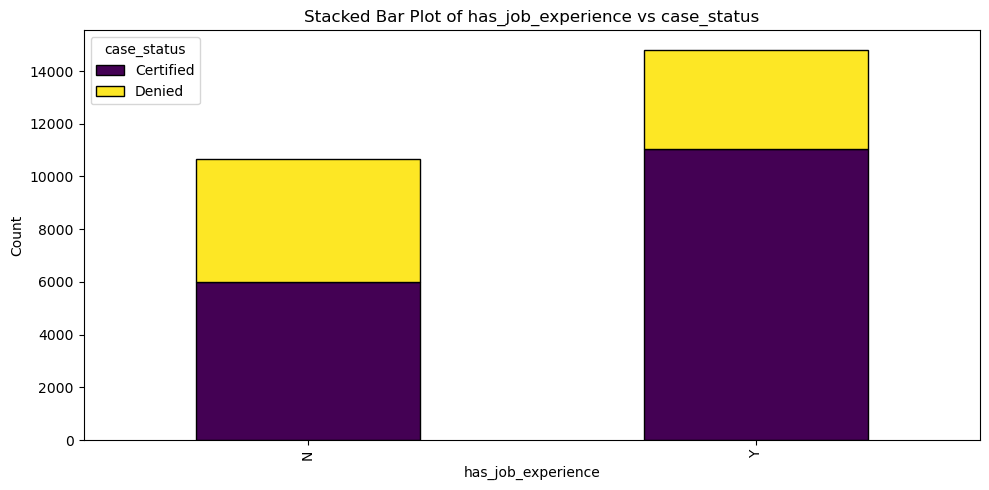

In [ ]:
def stacked_barplot(data, feature1, feature2):
    """
    Create a stacked bar plot for two specified features.

    data: DataFrame
    feature1: Column name for the x-axis
    feature2: Column name for the stacking
    """
    # Create a crosstab to count occurrences of each combination
    crosstab_data = pd.crosstab(data[feature1], data[feature2])

    # Create a stacked bar plot
    crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 5), cmap='viridis', edgecolor='black')

    # Add labels and title
    plt.xlabel(feature1)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Plot of {feature1} vs {feature2}')

    # Show the plot
    plt.tight_layout()
    plt.show()

stacked_barplot(data, 'has_job_experience', 'case_status')


#### Do the employees who have prior work experience require any job training?

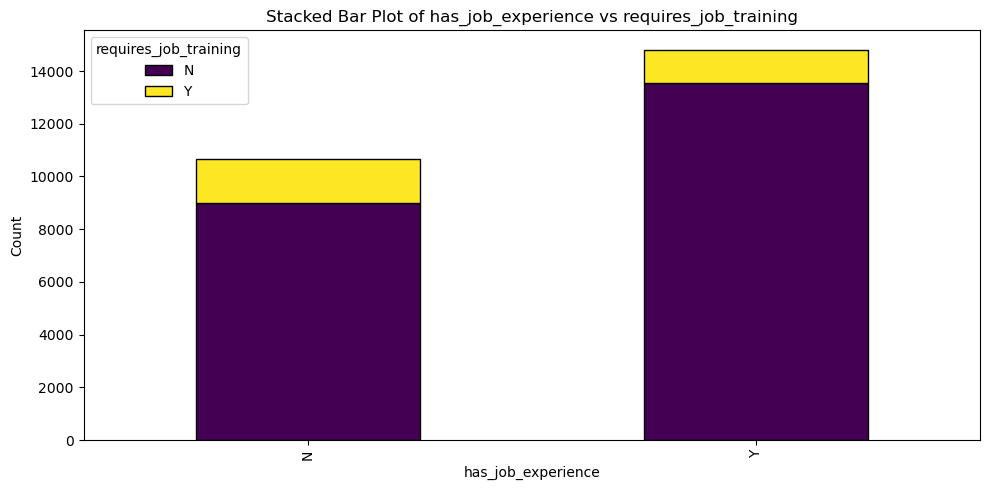

In [ ]:
# Call the function for 'has_job_experience' and 'requires_job_training'
stacked_barplot(data, 'has_job_experience', 'requires_job_training')

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

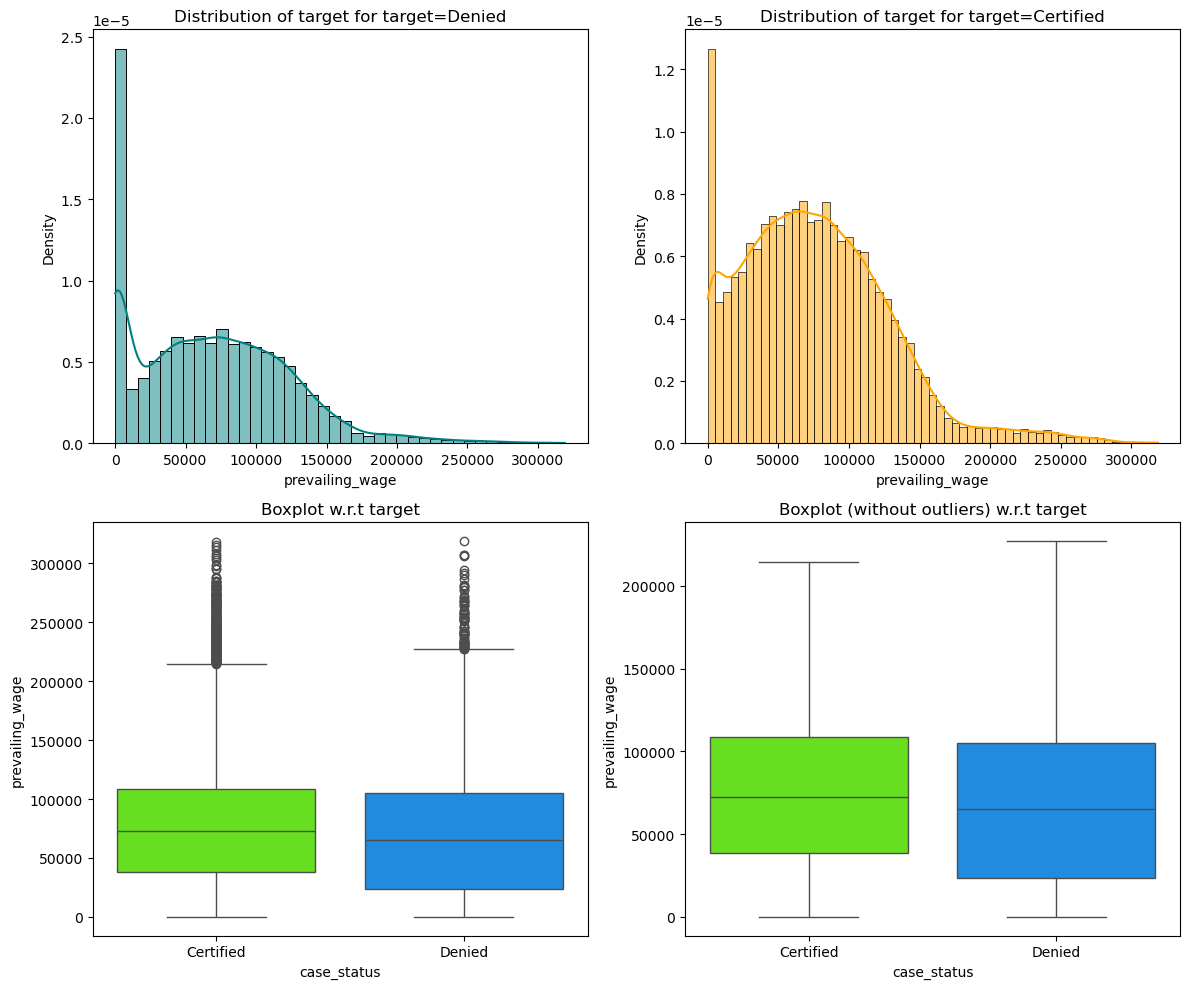

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

#### Checking if the prevailing wage is similar across all the regions of the US

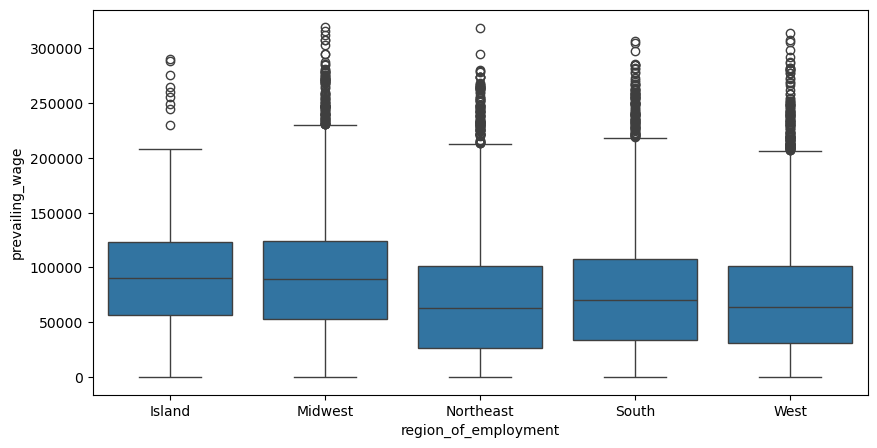

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data)  # Complete the code
plt.show()

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

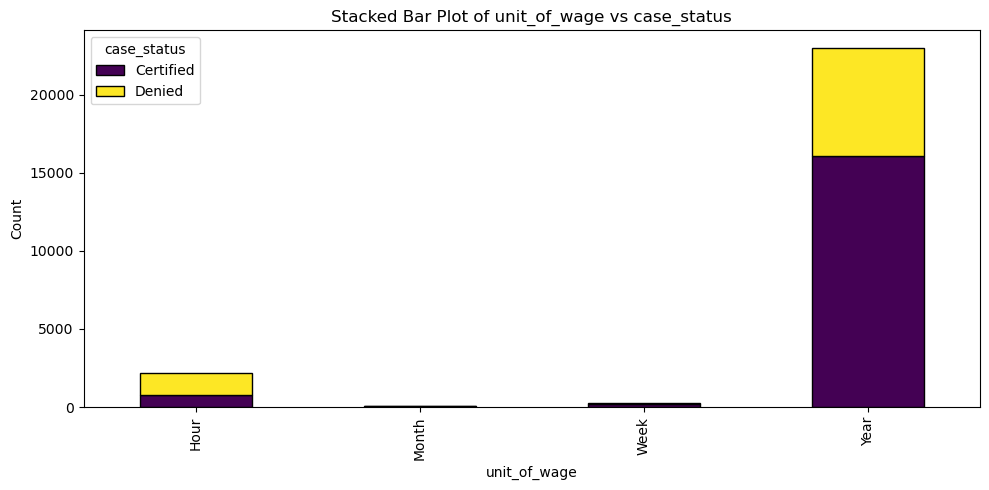

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')  # Complete the function call

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

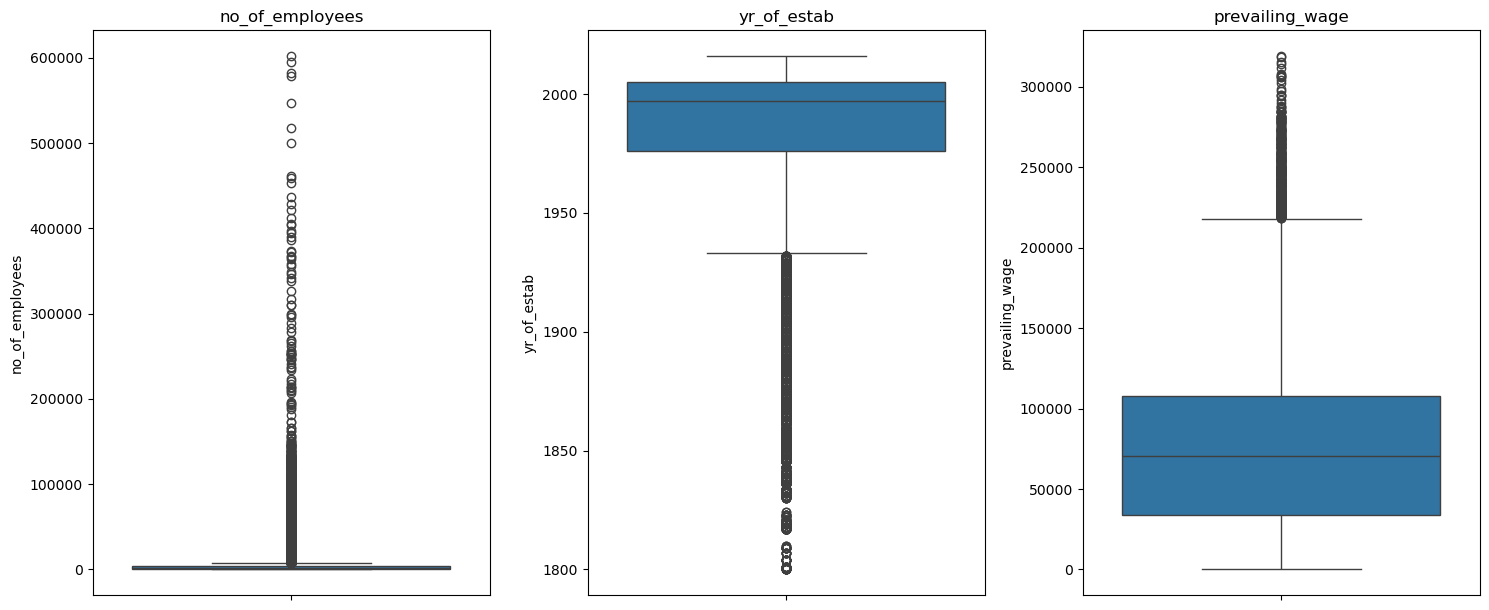

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)  # Adjust layout
    sns.boxplot(y=data[variable])  # Create a boxplot for each numeric column
    plt.title(variable)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Drop 'case_status' from the data to create feature matrix X
X = data.drop(columns=["case_status"])

# Create dummy variables for categorical features in X
X = pd.get_dummies(X, drop_first=True)

# Create target vector y from the 'case_status' column
y = data["case_status"]

# Splitting data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
Certified    0.667919
Denied       0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
Certified    0.667844
Denied       0.332156
Name: proportion, dtype: float64


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
Certified    0.667919
Denied       0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
Certified    0.667844
Denied       0.332156
Name: proportion, dtype: float64


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

* ✅✅✅ **VERY IMPORTANT:** we want to create a baseline model first, for example random guess of the target column, which means the baseline model predicts 50% of the cases that a visa is certified, or use the larger class probablily model as the baseline.  

* A **receiver operating characteristic (ROC)** curve is a graph that shows how well a binary classifier performs. It's used to evaluate the performance of machine learning models.

In [ ]:
target_colname = 'case_status'
data[target_colname].value_counts(normalize=True)
## the larger class is "certified". we will encode "certified" as 1, else 0.

case_status
Certified    0.667896
Denied       0.332104
Name: proportion, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# ✅ Simulating a random guess model
class RandomGuessModel:
    def __init__(self, probability_threshold=0.5):
        self.probability_threshold = probability_threshold

    def predict(self, data):
        # Generate random probabilities for predictions
        random_probabilities = np.random.rand(len(data))
        # Predict 1 if probability is less than the threshold, else 0
        return np.where(random_probabilities < self.probability_threshold, 1, 0)

def model_performance(true, pred):
    acc = accuracy_score(true, pred)  # to compute Accuracy
    recall = recall_score(true, pred, average='weighted')  # to compute Recall
    precision = precision_score(true, pred, average='weighted')  # to compute Precision
    f1 = f1_score(true, pred, average='weighted')  # to compute F1-score
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

model = RandomGuessModel(probability_threshold=1)
## ✅ follow the sklearn "X, y" and "true, pred" naming conventions
y_true = data[target_colname].map({'Certified': 1, 'Denied': 0})
y_pred = model.predict(data)
model_performance(y_true, y_pred)
## now we have a baseline model, whose performance is listed as below.
## models are expected to perform better than the baseline model.

Accuracy    Recall  Precision        F1
0  0.667896  0.667896   0.446086  0.534908

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)
## since we "predicted" 100% certified cases, there won't be any false negative.
## there are only true positives (17018) and false positives (8462).

array([[    0,  8462],
       [    0, 17018]])

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

* ✅ And now it is time to do some **feature transformation** to address the data imbalance, data skewness, etc. problems.   

* ✅ For learning purposes, we'll try out each of these models individually. In production, however, there are automation tools that can automatially transform the features, take care of data imbalance, etc. and run multiple models with a set of hyperparameters automatically. e.g. **AutoGluon** ([check the example notebook](https://github.com/nov05/udacity-cd0385-project-starter/blob/main/project/project_notebook.ipynb)), which by default will run the following 8 models for you.  

```json
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}
```

* ✅ For tabular data, so far the best model is usually `xgboost`.

* ✅ Here is a scikit-learn data transformation pipeline example. [Check the Colab notebook](https://colab.research.google.com/drive/1mVzsoMY7v4NLYnSPiwx9oozOP8yDVVoI#scrollTo=AxvNKUCgEqBQ).   

```python
###############################################
# Pipeline preprocessor
###############################################
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', ce.OneHotEncoder(drop_invariant=True, use_cat_names=True))])
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', ce.OrdinalEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('one', onehot_transformer, lowcardi_features), # categorical_features
        ('ord', ordinal_transformer, highcardi_features), # categorical_features
    ])
```

In [ ]:
print(len(data.columns))
data.columns

13


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'no_of_employees_abs'],
      dtype='object')

In [ ]:
## we decide to drop 'case_id' (unique), 'case_status' (target), 'no_of_employees' (abs)
cols_to_drop = ['case_id', 'no_of_employees', 'case_status']
numeric_features = data.drop(cols_to_drop, axis=1).select_dtypes(include=np.number).columns.to_list()
categorical_features = data.drop(cols_to_drop, axis=1).select_dtypes(exclude=np.number).columns.to_list()
print((len(numeric_features), len(categorical_features)))
print(numeric_features)
print(categorical_features)

(3, 7)
['yr_of_estab', 'prevailing_wage', 'no_of_employees_abs']
['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']


In [ ]:
# select low cardinality features for one-hot encoding
# select high cardinality features for ordinal encoding
highcardi_features = [col for col in categorical_features if len(data[col].value_counts()) >= 10]   ## Number 10 is decided subjectively.
lowcardi_features = [col for col in categorical_features if len(data[col].value_counts()) < 10]
print(len(highcardi_features), len(lowcardi_features))
print(highcardi_features)
print(lowcardi_features)

0 7
[]
['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']


In [ ]:
!pip install category_encoders
## Successfully installed category_encoders-2.8.0

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, \
     OneHotEncoder, OrdinalEncoder, LabelEncoder, \
     QuantileTransformer, FunctionTransformer
import category_encoders as ce
# from category_encoders.binary import BinaryEncoder
log_transformer = FunctionTransformer(np.log1p, validate=True)
###############################################
# Pipeline preprocessor
###############################################
numeric_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='median')),        ## ⚠️ In this case, there is no missing value.
    ('log', log_transformer),
    ('scaler', StandardScaler()),
])
onehot_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', ce.OneHotEncoder(drop_invariant=True, use_cat_names=True)),
    ('quantile', QuantileTransformer(output_distribution='normal')),
])
# ordinal_transformer = Pipeline(steps=[                     ## ⚠️ In this case, there is no high cardinality column.
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('ordinal', ce.OrdinalEncoder()),
# ])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('one', onehot_transformer, lowcardi_features), # categorical_features
        # ('ord', ordinal_transformer, highcardi_features), # categorical_features
    ])

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(cols_to_drop, axis=1)
y = data["case_status"].map({'Certified': 1, 'Denied': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
%%time
from xgboost import XGBClassifier, XGBRegressor
from sklearn.utils.class_weight import compute_class_weight
###############################################
# XGBoost
###############################################
# Compute class weights using sklearn
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# scale_pos_weight = class_weights[1] / class_weights[0]  # Assuming class 1 is the positive class
params = {
    'objective': 'binary:logistic',  # Binary classification
    # 'scale_pos_weight': scale_pos_weight,
    'n_jobs': -1,
}
pipeline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('xgb', XGBClassifier(**params)),
    ]
)
pipeline.fit(X_train, y_train)

CPU times: user 1.69 s, sys: 64 µs, total: 1.69 s
Wall time: 1.51 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['yr_of_estab',
                                                   'prevailing_wage',
                                                   'no_of_employees_abs']),
                                                 ('one',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop_invariant=True,
                                                                                 use_cat_names=True)),
                                                                  ('quantile',
                                                                   QuantileTrans...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
model_performance(y_test, pipeline.predict(X_test))
## 0.726583 >= baseline 66%

Accuracy    Recall  Precision        F1
0  0.726583  0.726583   0.715325  0.716614

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

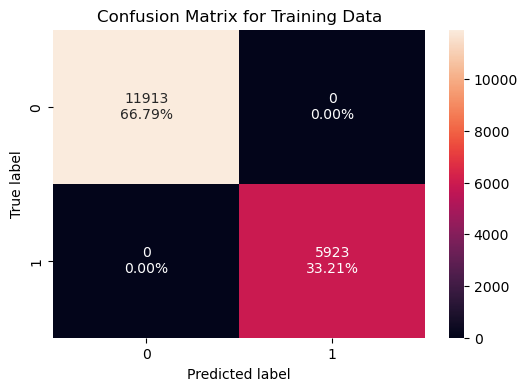

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)
plt.title("Confusion Matrix for Training Data")
plt.show()

In [ ]:
# Check performance on training data
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
print(decision_tree_perf_train)
## ⚠️ too good to be true
##   Accuracy  Recall  Precision   F1
##        1.0     1.0        1.0  1.0

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on test set

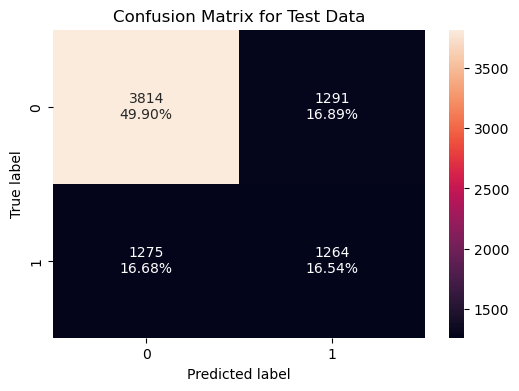

In [ ]:
# Confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

In [ ]:
# Check performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.664312  0.664312   0.664845  0.664576

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

### Hyperparameter Tuning - Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
# Specify the appropriate positive label
scorer = metrics.make_scorer(metrics.f1_score, pos_label='Certified')

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_estimator, param_grid=parameters, scoring=scorer, n_jobs=-1)

# Fit the grid_obj on the train data
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

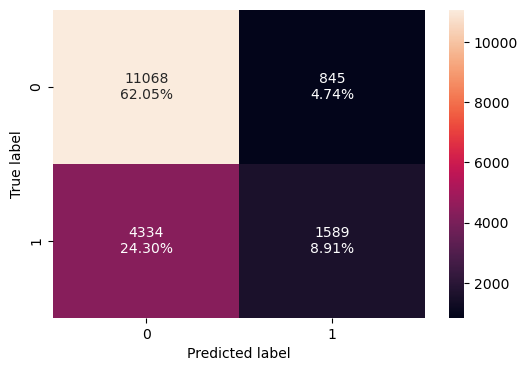

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.709632  0.709632   0.696766  0.667563


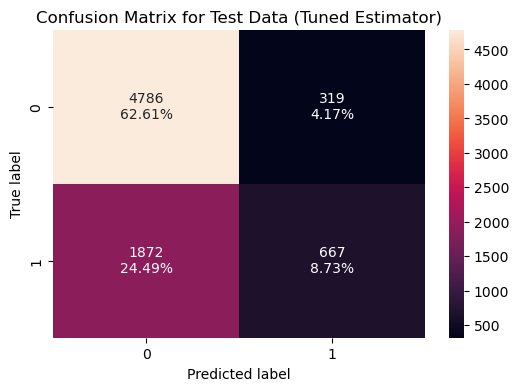

In [ ]:
# Create confusion matrix for test data on the tuned estimator
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)
plt.title("Confusion Matrix for Test Data (Tuned Estimator)")
plt.show()

In [ ]:
# Check performance on test data for the tuned estimator
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

Accuracy   Recall  Precision        F1
0   0.71337  0.71337   0.704763  0.669151

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

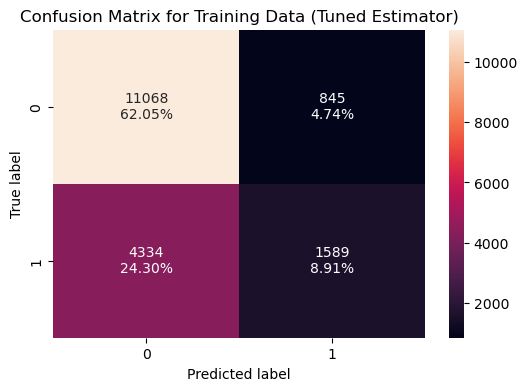

In [ ]:
# Create confusion matrix for training data on the tuned estimator
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)
plt.title("Confusion Matrix for Training Data (Tuned Estimator)")
plt.show()

In [ ]:
# Check performance on training data for the Bagging Classifier
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

Accuracy    Recall  Precision        F1
0  0.977573  0.977573   0.977862  0.977429

In [ ]:
# Output the performance metric
bagging_classifier_model_train_perf

0.9775734469612021

#### Checking model performance on test set

In [ ]:
def confusion_matrix_sklearn_bagging_test(model):
    """
    Creates and plots a confusion matrix for the test data using the bagging classifier.

    Args:
        model: The trained scikit-learn bagging classifier.
    """
    y_pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Bagging Test Data)')
    plt.show()

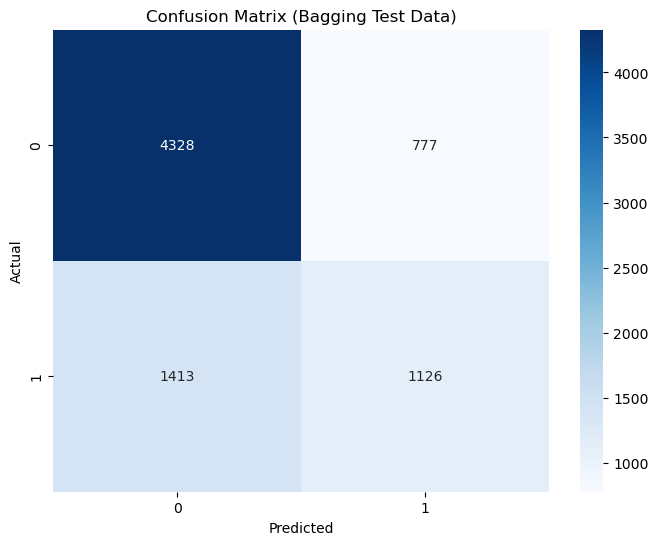

In [ ]:
# Create confusion matrix for test data using the bagging classifier
confusion_matrix_sklearn_bagging_test(bagging_classifier)

In [ ]:
# Check performance on test data for the Bagging Classifier
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.713501  0.713501   0.700007  0.701391

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics

# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5, 0.7, 1],
    "n_estimators": np.arange(50, 110, 25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=bagging_estimator_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)

# Fit the grid_obj on train data
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)# Call the function to create the confusion matrix for the training data
confusion_matrix_sklearn_bagging_train(bagging_estimator_tuned)

BaggingClassifier(max_features=0.5, max_samples=0.7, n_estimators=50,
                  random_state=1)

#### Checking model performance on training set

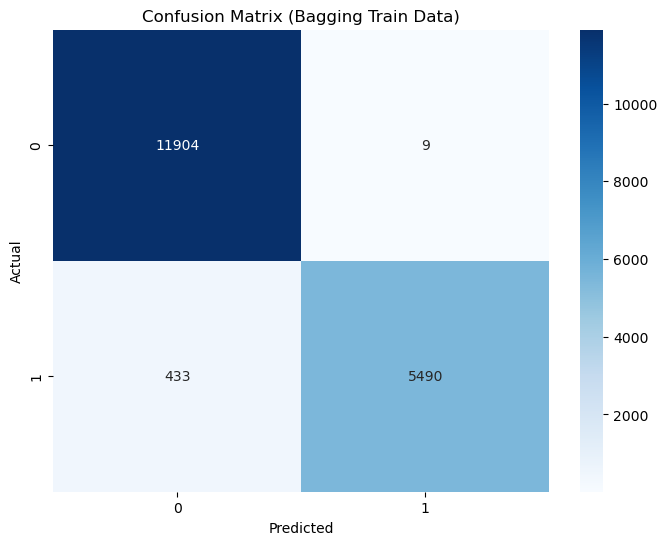

In [ ]:
# Call the function to create the confusion matrix for the training data
confusion_matrix_sklearn_bagging_train(bagging_estimator_tuned)

In [ ]:
# Check performance on training data for the tuned Bagging Classifier
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0  0.975219  0.975219   0.976014  0.974975

#### Checking model performance on test set

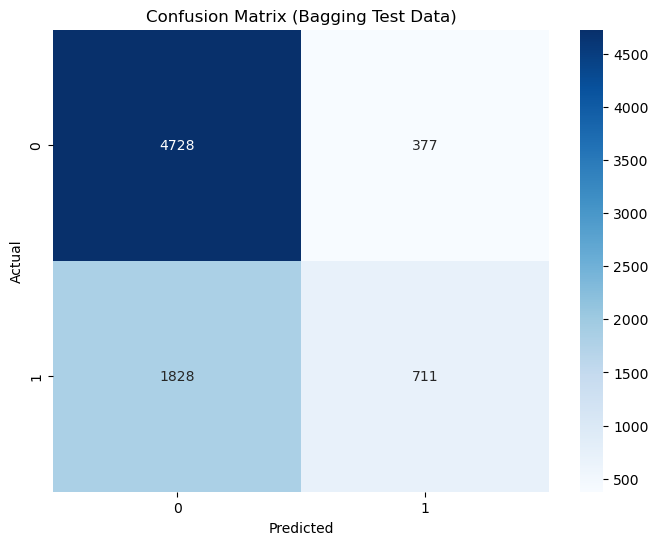

In [ ]:
# Call the function to create the confusion matrix for the test data
confusion_matrix_sklearn_bagging_test(bagging_estimator_tuned)

In [ ]:
# Check performance on test data for the tuned Bagging Classifier
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.711538  0.711538   0.698692  0.671785

### Random Forest

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')  # Define the Random Forest classifier
rf_estimator.fit(X_train, y_train)  # Fit the Random Forest on the training data

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

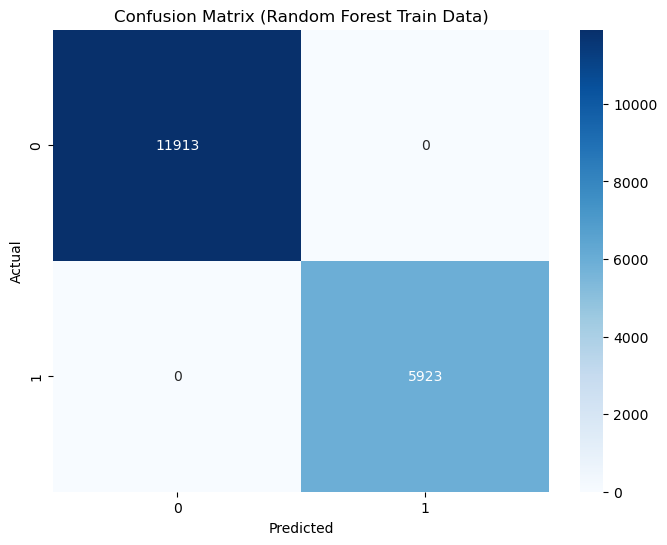

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')  # Define the Random Forest classifier
rf_estimator.fit(X_train, y_train)  # Fit the Random Forest on the training data

# Create confusion matrix for training data
y_pred_train = rf_estimator.predict(X_train)  # Predict on the training data
cm_train = confusion_matrix(y_train, y_pred_train)  # Compute the confusion matrix

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Train Data)')
plt.show()

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)  # Check performance on train data
rf_estimator_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Checking model performance on test set

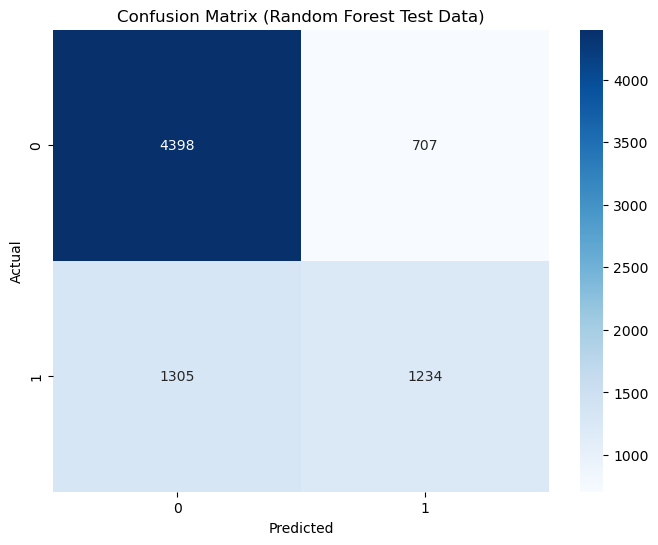

In [ ]:
# Create confusion matrix for test data
y_pred_test = rf_estimator.predict(X_test)  # Predict on the test data
cm_test = confusion_matrix(y_test, y_pred_test)  # Compute the confusion matrix

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Test Data)')
plt.show()

In [ ]:
# Calculating different metrics for test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)  # Check performance for test data
rf_estimator_model_test_perf

Accuracy    Recall  Precision        F1
0  0.736787  0.736787   0.726193  0.726502

### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_tuned, param_grid=parameters, scoring=acc_scorer, cv=5, n_jobs=-1)  # Complete the grid search

# Fit the grid object on the train data
grid_obj.fit(X_train, y_train)  # Fit the grid_obj on the train data
# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/py

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=10,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
ab_classifier = '_______' ## Complete the code to define AdaBoost Classifier with random state = 1
ab_classifier.'_______' ## Complete the code to fit AdaBoost Classifier on the train data

#### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data
ab_classifier_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data
ab_classifier_model_test_perf

### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = '_______' ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

### Gradient Boosting Classifier

In [ ]:
gb_classifier = '_______' ## Complete the code to define Gradient Boosting Classifier with random state = 1
gb_classifier.'_______' ## Complete the code to fit Gradient Boosting Classifier on the train data

#### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data
gb_classifier_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data
gb_classifier_model_test_perf

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = '_______' ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [ ]:
xgb_classifier = '_______' ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.'_______' ## Complete the code to fit XGBoost Classifier on the train data

#### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = '_______' ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data on tuned estimator

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = '_______' ## Complete the code to define Stacking Classifier

stacking_classifier.'_______' ## Complete the code to fit Stacking Classifier on the train data

### Checking model performance on training set

In [ ]:
'_______' ## Complete the code to create confusion matrix for train data

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data
stacking_classifier_model_train_perf

### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

'_______' ## Complete the code to check performance for test data

### Important features of the final model

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

-


___